In [80]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import cv2 as ocv
import scipy as sp

from mpl_toolkits.mplot3d import Axes3D

In [27]:
#Import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

##(1)Create the image of a paraboloid with one axis scaled (like an oval paraboloid)

In [171]:
#setup
angleTheta = np.arange(0, (2*np.pi), 0.01)
zAxis = np.arange(0 , 1 ,0.01)
angleTheta, zAxis = np.meshgrid(angleTheta,zAxis)

root = np.sqrt(zAxis*2)

xAxis = root * np.cos(angleTheta) 
yAxis = root * np.sin(angleTheta)

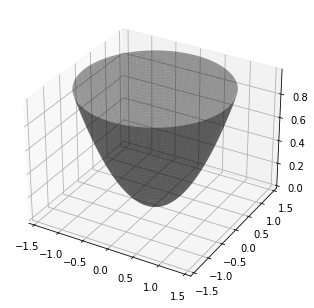

In [172]:
#3d figure
fgr_1 = Axes3D(plt.figure())
fgr_1.plot_surface(xAxis,yAxis,zAxis, color = 'k',alpha = 0.4)
plt.show()

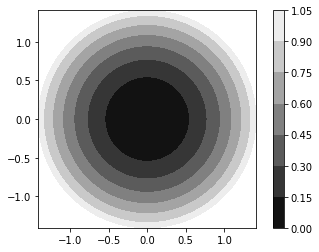

In [173]:
#2d figure
fgr_2 = plt.contourf(xAxis,yAxis,zAxis, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()
plt.show()

##(2) Create the image of a rotated sin(x) using rotation of coordinates.

In [174]:
#setup
xAxis = np.arange(-5, 5, 0.1)
yAxis = np.arange(-5, 5, 0.1)
xAxis, yAxis = np.meshgrid(xAxis, yAxis)
zAxis = np.sin(xAxis)

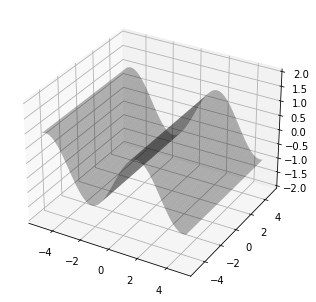

In [175]:
# #3d figure before rotating
fgr_1 = Axes3D(plt.figure())
fgr_1.plot_surface(xAxis,yAxis,zAxis, color = 'k',alpha = 0.3)
fgr_1.set_zlim(-2,2)
plt.show()

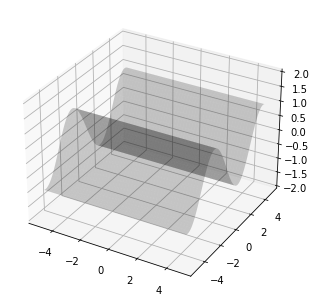

In [176]:
#3d figure after rotating 
zAxis =  sp.ndimage.rotate(zAxis, 90,reshape= False)
fgr_1 = Axes3D(plt.figure())
fgr_1.plot_surface(xAxis,yAxis,zAxis, color = 'k',alpha = 0.2)
fgr_1.set_zlim(-2,2)
plt.show()

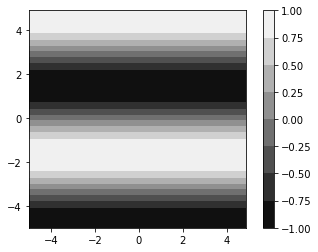

In [177]:
#2d figure
fgr_2 = plt.contourf(xAxis,yAxis,zAxis, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()
plt.show()

##(3) Create the image of a gaussian in 2D.

In [178]:
#setup
xAxis = np.arange(-5, 5, 0.1)
yAxis = np.arange(-5, 5, 0.1)
xAxis, yAxis = np.meshgrid(xAxis, yAxis)
zAxis = np.exp(-0.5*xAxis**2-0.5*yAxis**2)

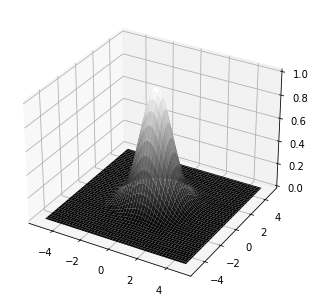

In [179]:
#3d figure
fgr_1 = Axes3D(plt.figure())
fgr_1.plot_surface(xAxis,yAxis,zAxis, cmap=plt.cm.gray)
plt.show()

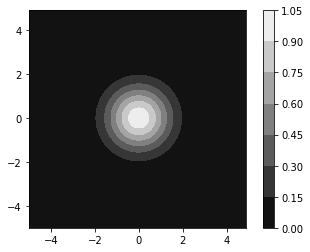

In [180]:
#2d figure
fgr_2 = plt.contourf(xAxis,yAxis,zAxis, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()
plt.show()

##(4) Create a function that generates the image of a Gaussian optionally rotated by an angle \theta and with mx, my, sx, sy as input arguments.

In [181]:
def rotateGaussian(mx, my, sx, sy, theta):

    xAxis = np.arange(-10, 10, 0.1)
    yAxis = np.arange(-10, 10, 0.1)
    xAxis, yAxis = np.meshgrid(xAxis, yAxis)
    
    theta = np.radians(theta)

    sx = sx**2; 
    sy = sy**2
    coef_1 = np.cos(theta)**2/(2*sx) + np.sin(theta)**2/(2*sy)
    coef_2 = np.sin(theta)**2/(2*sx) + np.cos(theta)**2/(2*sy)
    coef_3 = np.sin(2*theta)/(4*sx) - np.sin(2*theta)/(4*sy)

    zAxis = np.exp(-coef_1*(xAxis-mx)**2 - coef_2*(yAxis-my)**2 - 2*coef_3*(xAxis-mx)*(yAxis-my))

    #3d figure
    fgr_1 = Axes3D(plt.figure())
    fgr_1.plot_surface(xAxis,yAxis,zAxis, cmap=plt.cm.gray)
    plt.show()

    #2d figure
    fgr_2 = plt.contourf(xAxis,yAxis,zAxis, cmap = 'gray')
    plt.axis('scaled')
    plt.colorbar()
    plt.show()

In [182]:
#Setup
theta = 38 #dgr
mx = 0.8
my = 0.5
sx = 2
sy = 1

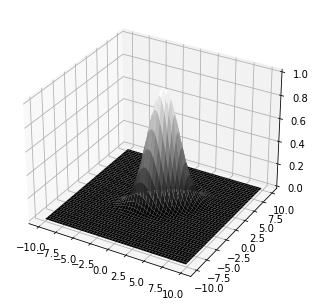

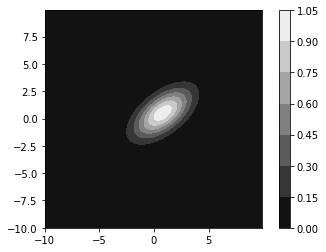

In [183]:
rotateGaussian(mx,my,sx,sy,theta)